In [29]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import pandas as pd
import time

## Preprocessing

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data/training',
        target_size=(64, 64), # same as the input_shape parameter at step 1 (Convolution)
        batch_size=32,
        class_mode="categorical")

# test_set = test_datagen.flow_from_directory(
#         'dataset/test_set',
#         target_size=(64, 64),
#         batch_size=32,
#         class_mode='binary')

Found 1055 images belonging to 6 classes.


In [10]:
len(training_set)

33

In [5]:
# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
classifier.add(Dropout(0.3)) 
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation="relu")) # didn't need the input shape when taking from another convolution layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3)) 

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection 
classifier.add(Dense(units = 128, activation = 'relu')) # hidden layer
classifier.add(Dense(units = 6, activation = 'softmax')) # outpput layer

In [9]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [15]:
classifier.fit_generator(training_set,
                    steps_per_epoch=100, # number of images in training set
                    epochs=25) # number of images in test set

Epoch 1/25
100/100 [==============================] - 33s 334ms/step - loss: 1.2201 - accuracy: 0.5496
Epoch 2/25
100/100 [==============================] - 38s 378ms/step - loss: 1.0786 - accuracy: 0.6015
Epoch 3/25
100/100 [==============================] - 34s 344ms/step - loss: 0.9277 - accuracy: 0.6662
Epoch 4/25
100/100 [==============================] - 33s 328ms/step - loss: 0.8047 - accuracy: 0.7201
Epoch 5/25
100/100 [==============================] - 32s 324ms/step - loss: 0.7227 - accuracy: 0.7450
Epoch 6/25
100/100 [==============================] - 33s 327ms/step - loss: 0.6270 - accuracy: 0.7852
Epoch 7/25
100/100 [==============================] - 32s 323ms/step - loss: 0.5460 - accuracy: 0.8136
Epoch 8/25
100/100 [==============================] - 32s 323ms/step - loss: 0.4553 - accuracy: 0.8461
Epoch 9/25
100/100 [==============================] - 32s 320ms/step - loss: 0.3968 - accuracy: 0.8664
Epoch 10/25
100/100 [==============================] - 33s 329ms/step - l

In [23]:
# classify a single image
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(64, 64))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [26]:
test = read_image("data/training/bar/wsj159.png")
classifier.predict_classes(test)

[INFO] loading and preprocessing image...


array([0])

In [35]:
def test_single_image(path):
    labels = ['bar', 'info', 'line', 'map', 'other', 'scatter']
    images = read_image(path)
    time.sleep(.5)
    preds = classifier.predict_proba(images)
    for idx, l, x in zip(range(0,6), labels , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, l, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = classifier.predict_classes(images)
    class_dictionary = training_set.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

[INFO] loading and preprocessing image...
ID: 0, Label: bar 0.0%
ID: 1, Label: info 99.56%
ID: 2, Label: line 0.0%
ID: 3, Label: map 0.44%
ID: 4, Label: other 0.0%
ID: 5, Label: scatter 0.0%
Final Decision:
.
..
...
ID: 1, Label: info


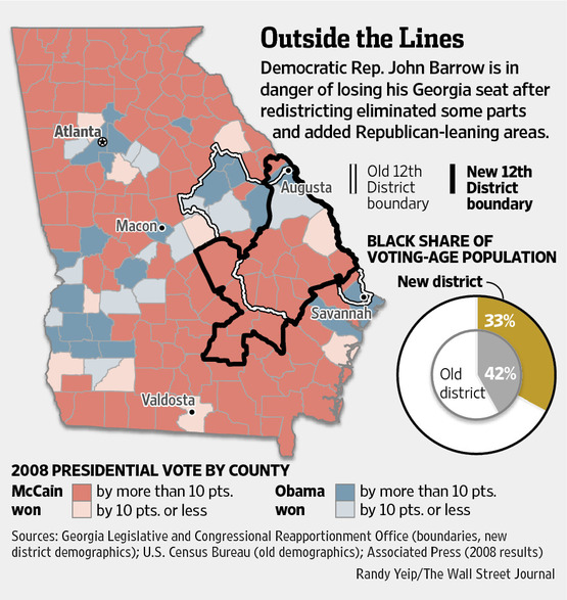

In [45]:
test_single_image("../dataviz_train/wsj326.png")